<img src="https://static.uni-graz.at/fileadmin/nawi-institute/Erdwissenschaften/NawiGrazGeozentrum_Small.png" align="right" width=200>

# Exercises Notebook 1 & 2

*Developed by Johannes Haas and Raoul Collenteur, 2020*

### Change your name here
Student name: XXXX XXXX

In [1]:
# Import matplotlib, numpy and pandas here
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

## Exercise 1: importing csv-files and plotting the time series
In this notebook we will work with precipitation and evaporation data, stored in the files `prec.csv` and `evap.csv` to calibrate a model that estimates groundwater recharge to observed recharge rates (`recharge.csv`). After importing and analyzing the raw data, we will use the data to calibrate a model to simulate recharge from these two time series. Let's start!

1. Import the two csv-files `prec.csv` and `evap.csv` and make sure that the index is a DatetimeIndex and that the data type is a Pandas Series.
2. Plot both time series in one figure that contains two suplots (you learned this in Notebook 2).
3. Add all important figure elements (labels, legend, etc.) and save the figure.

In [27]:
#Type your answer here
rain = pd.read_csv("rain.csv", parse_dates=True, usecols=[0,1], delimiter=",",
                   index_col=0, squeeze=True, dayfirst=True)
evap = pd.read_csv("evap.csv", parse_dates=True, usecols=[0,1], delimiter=",",
                   index_col=0, squeeze=True, dayfirst=True)

# Plot the results
fig, [ax1, ax2] = plt.subplots(2,1, sharex=True)
ax1.plot(rain)
ax2.plot(evap)

ax1.set_ylabel("Precipitation [m/d]")
ax2.set_ylabel("Evaporation [m/d]")
ax2.set_xlabel("Time [years]");

In [29]:
type(evap)

pandas.core.frame.DataFrame

## Exercise 2: Describing Pandas time series
In this exercise you will analyze the time series you just imported to get an idea of the 

1. Resample both time series to annual sums by using the `resample` function from Pandas.
2. Plot the resampled time series. Use a barplot for this, [see documentation here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.plot.bar.html). Add all important figure element and add SI-units to the labels. What do you think are the units for this data?
3. report the mean and the standard deviations of the annual precipitation and evaporation fluxes (print to screen).

Mean precipitation is 0.76 and the standard deviation is 0.1


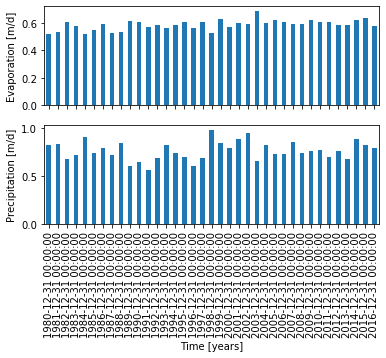

In [8]:
#Type your answer here
EA = evap.resample("A").sum()
PA = rain.resample("A").sum()

fig, [ax1, ax2] = plt.subplots(2,1, sharex=True)
EA.plot.bar(ax=ax1)
PA.plot.bar(ax=ax2)

ax2.set_ylabel("Precipitation [m/d]")
ax1.set_ylabel("Evaporation [m/d]")
ax2.set_xlabel("Time [years]");

print("Mean precipitation is", PA.mean().round(2), "and the standard deviation is", PA.std().round(2))

## Exercise 3: Defining a model and an objective function
In this exercise you will develop a simple model to calculate recharge to the groundwater $R(t)$ from precipitation $P$ and evaporation $E$. The model is described by the following formula:

$ R(t) = (1-f_l) * P - f_c * E $

where the parameter $f_l$ is a factor determining which part of the precipitation is lost to interception and runoff, and the parameter $f_c$ is a factor that corrects the evaporation depending on the vegetation type. Note that if Evaporation exceeds Precipitation this may lead to negative groundwater recharge, which can be interpreted as evaporation from the groundwater.

Prepare the following two functions

1. load the csv file `recharge.csv` that contains the "observed" recharge. Make sure it is pandas Series with DatetimeIndex.
2. Define a function named `recharge_model` that calculates and returns $R(t)$ according to the above formula, using the two parameters $f_l$ and $f_c$.
3. Define a function named `obj_function` that implements the sum of squared residuals formula from Notebook 6 and returns the value for the objective function. Make sure the input parameters make it possible to use scipy's `minimize` method in the next Exercise.
4. Test both functions using the parameters $f_l=0.05$ and $f_c0.95$ and print the value of the objective function.

In [11]:
#Type your answer here
recharge = pd.read_csv("recharge.csv", parse_dates=True, index_col=0, squeeze=True)

def recharge_model(fl, fi):
    R = (1 - fl) * rain - fi * evap
    return R

def obj_function(p):
    R = recharge_model(p[0], p[1])
    res = R - recharge
    return (res**2).sum()

obj_function(p=[0.05, 0.95])

recharge_model(0.9, 0.1)

Date
1980-01-01    0.00031
1980-01-02    0.00022
1980-01-03    0.00001
1980-01-04    0.00074
1980-01-05    0.00079
               ...   
2016-11-18        NaN
2016-11-19        NaN
2016-11-20        NaN
2016-11-21        NaN
2016-11-22        NaN
Length: 13476, dtype: float64

## Exercise 4: Optimizing a model
1. import the `minimize` function from scipy.
2. Use the objective function defined in the previous exercise and calibrate the model parameters by fitting the model to the observed recharge in `recharge.csv`.
3. Calculate the simulated groundwater recharge using the optimized parameters.
4. Resample the observed and simulated recharge to annual sums and calculate the annual residuals by subtracting the observation from the simulation. Plot these residuals in a bar plot.
5. Add all figure elements and print the estimated parameters as a title of the plot.

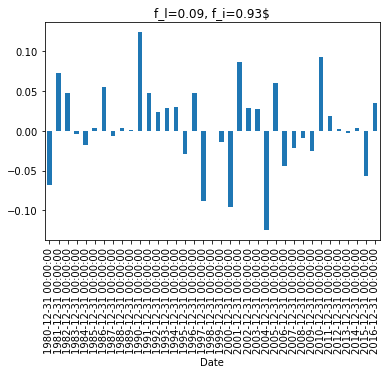

In [71]:
#Type your answer here
from scipy.optimize import minimize

p0 = [0.5, 0.5]
result = minimize(obj_function, p0)

# Plot the results
recharge_est = recharge_model(result.x[0], result.x[1])
(recharge_est.resample("A").sum()-recharge.resample("A").sum()).plot.bar()
plt.title("f_l={}, f_i={}$".format(result.x[0].round(2), result.x[1].round(2)));